In [1]:
import pandas as pd
import numpy as np
import process_data as pda
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from sklearn.decomposition import PCA
from itertools import cycle
import pickle
import re
import streamlit as st

#topic_df, model, vec, topic_list = pda.process_data()

#print(topic_list)
#topic_df.to_pickle('topic_df.pkl')

def create_clusters():
    #topic_df, model, vec, topic_list = pda.process_data()
    pca = PCA(n_components=2)
    topic_df = pd.read_csv('D:/Job_Recommender/topic_df2.csv')
    
    #topic_df = pd.read_pickle('topic_df.pkl')
    X_train = topic_df.iloc[:, 1:-1]
    print(X_train.head())
    y_train = topic_df.iloc[:, -1]
    y_vals = y_train.unique()
    model = pca.fit(X_train)

    return X_train, model.transform(X_train), y_train, y_vals, model



def plot_PCA_2D(data, target, target_names, user_data):
    colors = cycle(['black','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(10,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    plt.scatter(user_data[0][0], user_data[0][1], s = 150, color = 'red')
    plt.title('')
    plt.xlabel('DIFFEREN JOBS BASED ON THEIR TOPIC VALUES')
    plt.ylabel('MATCHING OF JOB BASED ON THE RESUME')
    plt.legend()

def transform_user_resume(pca_model, resume):
    '''
    take in resume and fit it according to both count vectorizer and PCA model
    '''
    #jobs_df, topic_model, vec, topic_list = pda.process_data()
      #topic_model_name = 'D:/Job_Recommender/topic_model1.sav'
    #pickle.dump(topic_model, open(topic_model_name, 'wb'))
    #vec_name = 'D:/Job_Recommender/job_vec1.sav'
    vec = pickle.load(open('D:/Job_Recommender/job_vec1.sav', 'rb'))
    topic_model = pickle.load(open('D:/Job_Recommender/topic_model1.sav', 'rb'))

    doc = pda.tokenize_stem(resume)
    doc = vec.transform(doc)
    doc = topic_model.transform(doc)
    doc = pd.DataFrame(doc)
#     X_train = doc.iloc[:, :-1]
#     y_train = doc.iloc[:, -1]
#     y_vals = y_train.unique()
    print(doc.shape)
    doc = pca_model.transform(doc)

    return doc

In [2]:

def plot_clusters():
    X_train, pca_train, y_train, y_vals, pca_model = create_clusters()
    for i, val in enumerate(y_train.unique()):
        y_train = y_train.apply(lambda x: i if x == val else x)
    resume = "data science enthusiast"
    user_input = re.sub('[^a-zA-Z0-9\.]', ' ', resume)
    user_input = user_input.lower()
    user_input = pd.Series(user_input)
    example = user_input
    doc = transform_user_resume(pca_model, example)

    plot_PCA_2D(pca_train, y_train, y_vals, doc)
    


    Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6   Topic 7  \
0  0.021822  0.389853  0.826393  0.091670 -0.331302 -0.192309 -0.027928   
1  0.026414  0.464419 -0.380194  0.661697 -0.354249  0.138438  0.029488   
2  0.984186 -0.077161 -0.003351  0.003039 -0.028155 -0.030448  0.005287   
3  0.013808  0.239761  0.270408 -0.077044  0.050744  0.427645 -0.142721   
4  0.005877  0.103393  0.046241 -0.053490  0.068139  0.115441  0.074897   

    Topic 8   Topic 9  Topic 10  Topic 11  Topic 12  Topic 13  Topic 14  \
0  0.041017  0.044024  0.038094  0.003838  0.002529 -0.009425 -0.006952   
1  0.039724  0.002628 -0.003853  0.011832  0.016790  0.002493  0.004839   
2  0.013593 -0.004818 -0.110806  0.028590 -0.055656  0.001010 -0.034117   
3 -0.144736 -0.125512 -0.381658 -0.128406  0.182852  0.172392  0.150467   
4 -0.061777  0.085336 -0.114770  0.615920  0.414321 -0.185063 -0.055373   

   Topic 15  Topic 16  Topic 17  Topic 18  Topic 19  Topic 20  
0 -0.003249  0.011337  0.012100 -0

C:\Users\avuda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\avuda\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


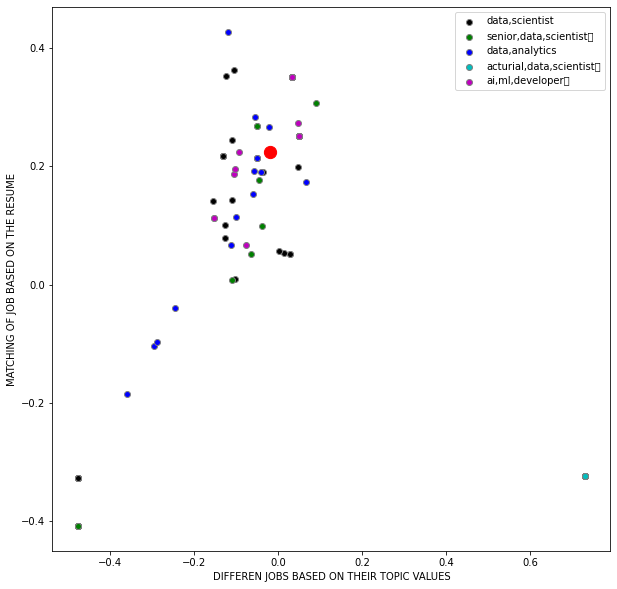

In [3]:
plot_clusters()